### Урок 3. Классификация. Логистическая регрессия.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [4]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [5]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [6]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [7]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [8]:
def calc_logloss(y, y_pred):
    err_ = []
    for k,i in enumerate(y_pred):
        if i==0 or y[k]==0:
            err_.append((1.0 - y[k]) * np.log(1.0 - i))
        else:
            err_.append(y[k] * np.log(i))
#     err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = -sum(err_)/len(err_)
    return err

In [9]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.8, 0.1])
calc_logloss(y1, y_pred1)

0.164252033486018

In [10]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [11]:
z = np.linspace(-10, 10, 101)

In [12]:
probabilities = sigmoid(z)

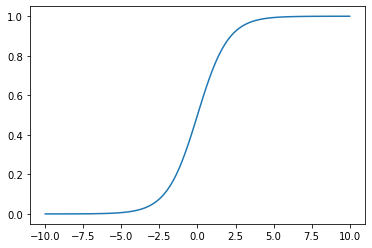

In [13]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [14]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    W_checked = np.array([np.inf]*X.shape[0])
    n = X.shape[1]
    i=0
    err_prev = np.inf
    err = 100
    print(W)
    while (i < iterations) and (err_prev/err > 1e-1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err_prev = err
        err = calc_logloss(y, y_pred)
        if ((W_checked[0]/W[0] < 1.001+alpha)|(W_checked[1]/W[1] < 1.001+alpha)) and (i % (iterations / 100) == 0):
#             print(alpha, i)
            alpha /= 1.1
        if i % (iterations / 10) == 0:
            print('итерация',i, '\tальфа = ',round(alpha,10), '\tlogloss = ',err)
        i+=1
        W_checked = W.copy()
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    return i, alpha, W, err

In [15]:
n_iterations, alpha, W, err = eval_model(X_st, y, iterations=10000000, alpha=1e-1)

[ 0.49671415 -0.1382643   0.64768854  1.52302986]
итерация 0 	альфа =  0.0909090909 	logloss =  1.1785958344356262
итерация 1000000 	альфа =  0.0350493899 	logloss =  0.06270681894991458
итерация 2000000 	альфа =  0.0135130571 	logloss =  0.05359857884098831
итерация 3000000 	альфа =  0.0052098685 	logloss =  0.05071217409419347
итерация 4000000 	альфа =  0.0020086298 	logloss =  0.049673377482854185
итерация 5000000 	альфа =  0.0007744138 	logloss =  0.049283080582692526
итерация 6000000 	альфа =  0.00029857 	logloss =  0.049134079153513824
итерация 7000000 	альфа =  0.0001151117 	logloss =  0.04907684956942886
итерация 8000000 	альфа =  4.43805e-05 	logloss =  0.04905481719932905
итерация 9000000 	альфа =  1.71106e-05 	logloss =  0.0490463275326572


In [16]:
n_iterations, alpha, W, err

(10000000,
 7.256571590148142e-06,
 array([-89.32118838,  -7.46904096, -25.4700489 ,  70.56700571]),
 0.04904305510865886)

In [17]:
def calc_pred_proba (W,X):
    X = calc_std_feat(X)
    y_pred_proba = sigmoid(np.dot(W.T, X))
    return y_pred_proba

calc_pred_proba(W,X)

array([4.55200491e-01, 2.35076038e-05, 1.94939389e-06, 4.15045843e-03,
       2.26783737e-22, 1.26624365e-07, 1.85191605e-23, 7.20095747e-35,
       9.19822731e-01, 3.99453419e-12])

In [22]:
def calc_pred (W,X):
    X = calc_std_feat(X)
    y_pred_proba = sigmoid(np.dot(W.T, X))>0.5
    return [1 if i else 0 for i in y_pred_proba ]

result_1 = calc_pred(W,X)
result_1

In [40]:
true_1_values = 0
false_1_values = 0
true_0_values = 0
false_0_values = 0
for k,i in enumerate(y):
    if y[k]==result_1[k] and y[k] ==1:
        true_1_values+=1
    elif y[k]==result_1[k] and y[k] ==0:
        true_0_values+=1
    elif y[k]!=result_1[k] and y[k] ==1:
        false_0_values+=1
    elif y[k]!=result_1[k] and y[k] ==0:
        false_1_values+=1
positive_rate = len(y[y==1])

accuracy = true_1_values / positive_rate
print('accuracy = ',accuracy)
precision = true_1_values / (true_1_values + false_1_values)
recall = true_1_values / (true_1_values + false_0_values)
print('precision = ',precision)
print('recall = ',recall)
print('f1_score = ', 2*precision*recall / (precision+recall))

accuracy =  0.2
precision =  1.0
recall =  0.2
f1_score =  0.33333333333333337


In [39]:
print('TP = ',true_1_values,'\nFP = ',false_1_values,'\nTN = ',true_0_values,'\nFN = ',false_0_values)
print('Значений = 1 в y: ',len(y[y==1]))
print('Значений = 0 в y: ',len(y[y==0]))

TP =  1 
FP =  0 
TN =  5 
FN =  4
Значений = 1 в y:  5
Значений = 0 в y:  5


### Модель, вероятно, "недоучилась": accuracy недостаточно высок, precision и recall - тоже; f1-score всего 1/3, что говорит о низком качестве модели (показывает плохие результаты на уже известных данных). Вероятно, модель покажет плохие результаты и на новых, неизвестных ей данных.

## Д/з

1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).
4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

5*. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?